# Knock Airport Weather
**Andre Hoarau**

## The objective of this notebook is to develop a progamme using data obtained from Knock Airport in Mayo Ireland: https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv
## The program(s) will plot
    * The temperature
    * The mean temperature each day
    * The mean temperature each month
    * The windsoeed
    * The rolling windspeed over 24 hours 
    * The max windspeed each day 
    * The monthly mean of the daily max windspeeds.

In [12]:
# Import out packages
import pandas as pd
knock_data= "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
df= pd.read_csv(knock_data, skiprows=22)
df.head()

C:\Users\andre.hoarau\AppData\Local\Temp\ipykernel_29200\3445903213.py:4: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(knock_data, skiprows=22)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [13]:
# I want to tidy the DF and remove any temp that is 0 from looking at it if it wasn't recorded it was left as 0. Whilst sometimes this might be true at lower temperatrues it appears to go closer to decimal places and therefore I feel this is efficient enough to not lose too much data.
df.drop(df.loc[df["temp"]==0].index, inplace=True)

In [14]:
# Get matplot lib 
import matplotlib.pyplot as plt


In [15]:
df.head

<bound method NDFrame.head of                      date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  \
0       10-apr-1996 14:00    0  0.0      0  11.5      0   8.1    3.9    0.0   
1       31-jul-1996 08:00    0  0.0      0  11.5      0  11.1   10.7    0.0   
2       31-jul-1996 09:00    0  0.0      0  11.6      0  10.7    9.8    0.0   
3       31-jul-1996 10:00    0  0.0      0  12.9      0  11.3    9.8    0.0   
4       31-jul-1996 11:00    0  0.0      0  14.5      0  10.8    7.0    0.0   
...                   ...  ...  ...    ...   ...    ...   ...    ...    ...   
247669  31-oct-2024 20:00    0  0.2      0  10.1      0  10.1   10.1   12.4   
247670  31-oct-2024 21:00    0  0.1      0  10.1      0  10.1   10.0   12.4   
247671  31-oct-2024 22:00    0  0.0      0  10.0      0  10.0   10.0   12.3   
247672  31-oct-2024 23:00    0  0.1      0   9.8      0   9.8    9.8   12.1   
247673  01-nov-2024 00:00    0  0.0      0   9.7      0   9.6    9.6   11.9   

        rhum  ... ind

In [16]:
# Step 1: Convert the first column to datetime, if needed
df["date"] = pd.to_datetime(df["date"])

# Step 2: Set the datetime column as the index
df_dateindex= df.set_index("date")

# Step 3: Resample to daily frequency at midnight and use the mean (or any other aggregation function)
df_daily = df_dateindex.resample("D").first()  # 'first' keeps the first row of each day, which is 00:00 if data is hourly

# Reset the index if you want "date" to be a column again
df_daily = df_daily.reset_index()

print(df_daily)

C:\Users\andre.hoarau\AppData\Local\Temp\ipykernel_29200\4049500963.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])


            date  ind  rain  ind.1  temp  ind.2  wetb  dewpt  vappr   rhum  \
0     1996-04-10  0.0   0.0    0.0  11.5    0.0   8.1    3.9    0.0    0.0   
1     1996-04-11  NaN  None    NaN   NaN    NaN   NaN    NaN    NaN    NaN   
2     1996-04-12  NaN  None    NaN   NaN    NaN   NaN    NaN    NaN    NaN   
3     1996-04-13  NaN  None    NaN   NaN    NaN   NaN    NaN    NaN    NaN   
4     1996-04-14  NaN  None    NaN   NaN    NaN   NaN    NaN    NaN    NaN   
...          ...  ...   ...    ...   ...    ...   ...    ...    ...    ...   
10428 2024-10-28  0.0   0.4    0.0  12.3    0.0  12.3   12.3   14.3  100.0   
10429 2024-10-29  0.0   0.0    0.0   9.9    0.0   9.9    9.9   12.2  100.0   
10430 2024-10-30  0.0   0.0    0.0  10.9    0.0  10.9   10.9   13.0  100.0   
10431 2024-10-31  0.0   0.1    0.0  10.5    0.0  10.5   10.5   12.7  100.0   
10432 2024-11-01  0.0   0.0    0.0   9.7    0.0   9.6    9.6   11.9   99.0   

       ... ind.3  wdsp ind.4  wddir    ww     w  sun    vis  cl

In [17]:
df_daily.dropna()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,1996-04-10,0.0,0.0,0.0,11.5,0.0,8.1,3.9,0.0,0.0,...,0.0,0,0.0,0,25,81,0.0,35000,32,5
112,1996-07-31,0.0,0.0,0.0,11.5,0.0,11.1,10.7,0.0,0.0,...,0.0,0,0.0,0,25,82,0.0,40000,45,5
113,1996-08-01,0.0,0.0,0.0,9.7,0.0,9.0,8.3,0.0,0.0,...,0.0,0,0.0,0,1,81,0.0,35000,999,3
114,1996-08-02,0.0,0.0,0.0,10.3,0.0,9.6,8.9,11.4,91.0,...,2.0,4,2.0,260,1,82,0.0,35000,30,6
115,1996-08-03,0.0,0.0,0.0,12.1,0.0,11.7,11.3,13.4,95.0,...,2.0,5,2.0,230,2,11,4.9,40000,39,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10428,2024-10-28,0.0,0.4,0.0,12.3,0.0,12.3,12.3,14.3,100.0,...,2.0,9,2.0,210,,,0.0,,0,8
10429,2024-10-29,0.0,0.0,0.0,9.9,0.0,9.9,9.9,12.2,100.0,...,2.0,3,2.0,250,,,0.0,,0,8
10430,2024-10-30,0.0,0.0,0.0,10.9,0.0,10.9,10.9,13.0,100.0,...,2.0,2,2.0,190,,,0.0,,0,8
10431,2024-10-31,0.0,0.1,0.0,10.5,0.0,10.5,10.5,12.7,100.0,...,2.0,6,2.0,210,,,0.0,,0,8


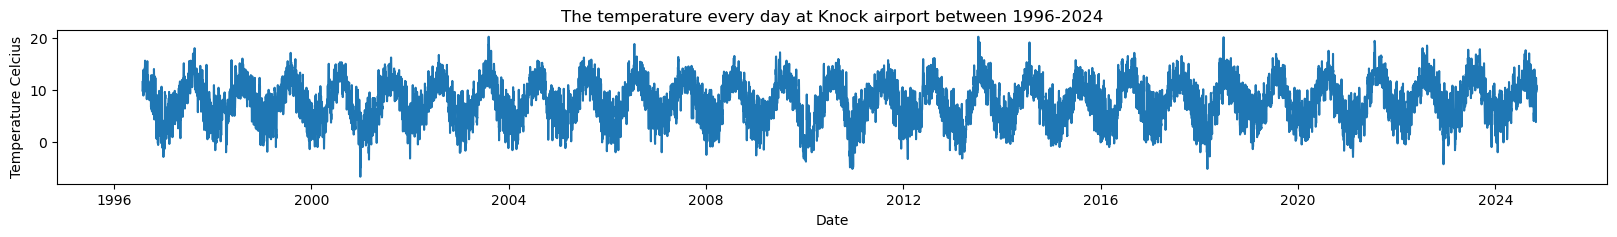

In [18]:
date= df_daily["date"]
temp= df_daily["temp"]
fig = plt.figure(figsize=(20, 2))
plt.xlabel("Date")
plt.ylabel("Temperature Celcius")
plt.title("The temperature every day at Knock airport between 1996-2024")
plt.plot(date,temp)

### Overall I feel we can see that it's not the best to plot this much data on one plot.
### Lets keep that in mind for the next part, the mean temperature each day.


In [21]:
# We take our indexed DF and resample on the daily with the average value.

df_daily_average = df_dateindex["temp"].resample("D").mean()

# We will convert this series back to a df reset the index.
df_daily_average = df_daily_average.dropna().reset_index(name="temp")



In [22]:
# Now lets make our plot 
datedaily = df_daily_average["date"]


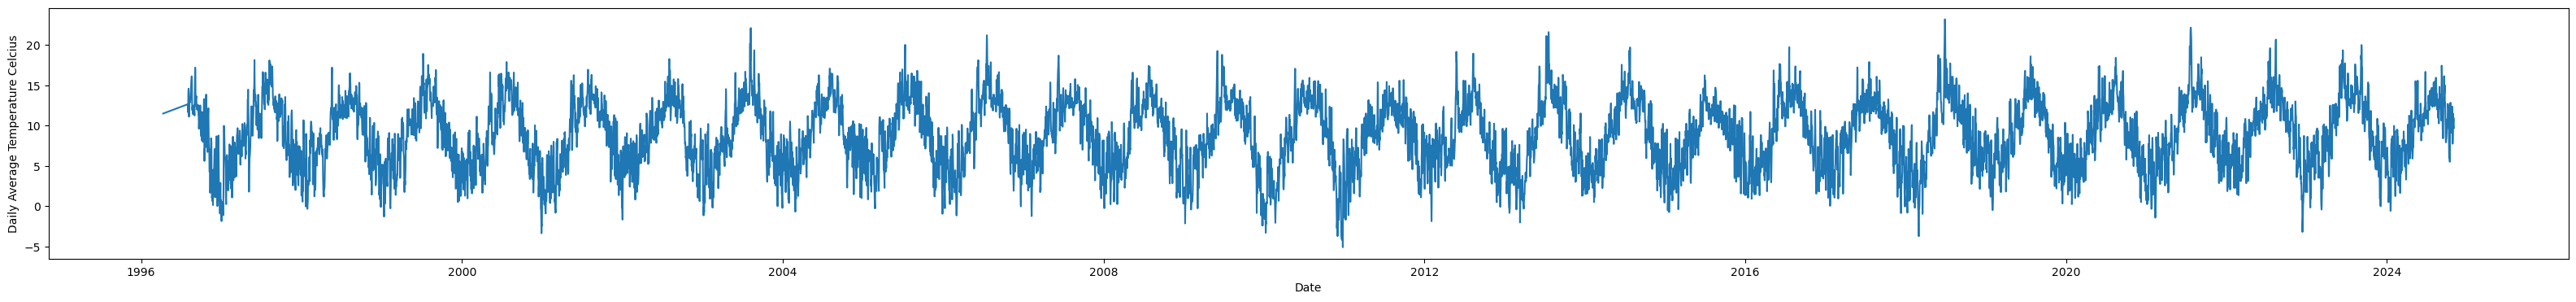

In [26]:
daily_average_temp = df_daily_average["temp"]
fig = plt.figure(figsize=(40, 4))
plt.xlabel("Date")
plt.ylabel("Daily Average Temperature Celcius")
plt.plot(datedaily, daily_average_temp)


### Now we will look at the mean temperature each month.

C:\Users\andre.hoarau\AppData\Local\Temp\ipykernel_29200\3129812702.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_average= df_dateindex["temp"].resample("M").mean()


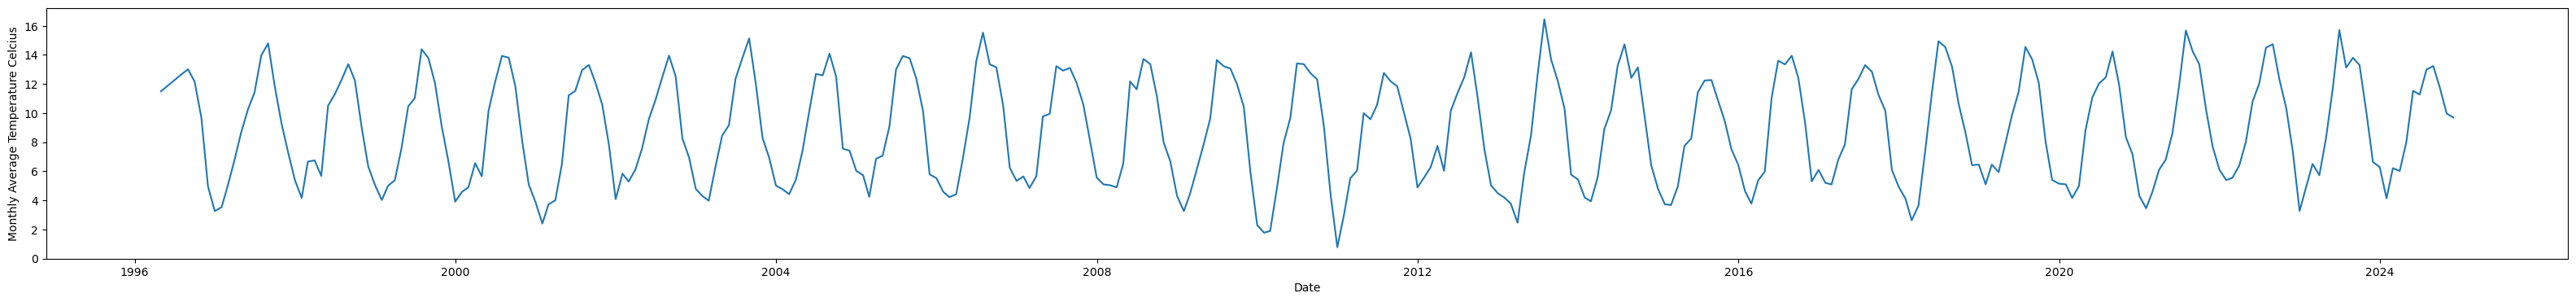

In [29]:
month_average= df_dateindex["temp"].resample("M").mean()
# We will convert this series back to a df reset the index.
month_average = month_average.dropna().reset_index(name="temp")

# Set up some variables
datemonth = month_average["date"]
monthtemp = month_average["temp"]
fig = plt.figure(figsize=(40, 4))
plt.xlabel("Date")
plt.ylabel("Monthly Average Temperature Celcius")
plt.plot(datemonth, monthtemp)


References:
* [Stack overflow on drop](https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value) - This link told me about drop.